--- 1. Downloading Dataset from KaggleHub ---
Using Colab cache for faster access to the 'waste-classification-data' dataset.
Path to downloaded dataset files (Kaggle cache): /kaggle/input/waste-classification-data
--- 2. Copying Dataset Locally ---
Destination directory 'waste_classification_data/DATASET' already exists. Skipping copy.
--- 3. Loading Images and Labels ---


Loading O: 100%|██████████| 12565/12565 [00:05<00:00, 2362.61it/s]



Total images loaded: 22564
Label Counts:
 label
O    12565
R     9999
Name: count, dtype: int64


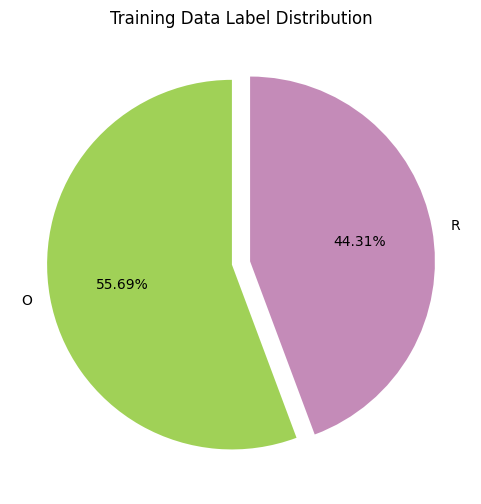

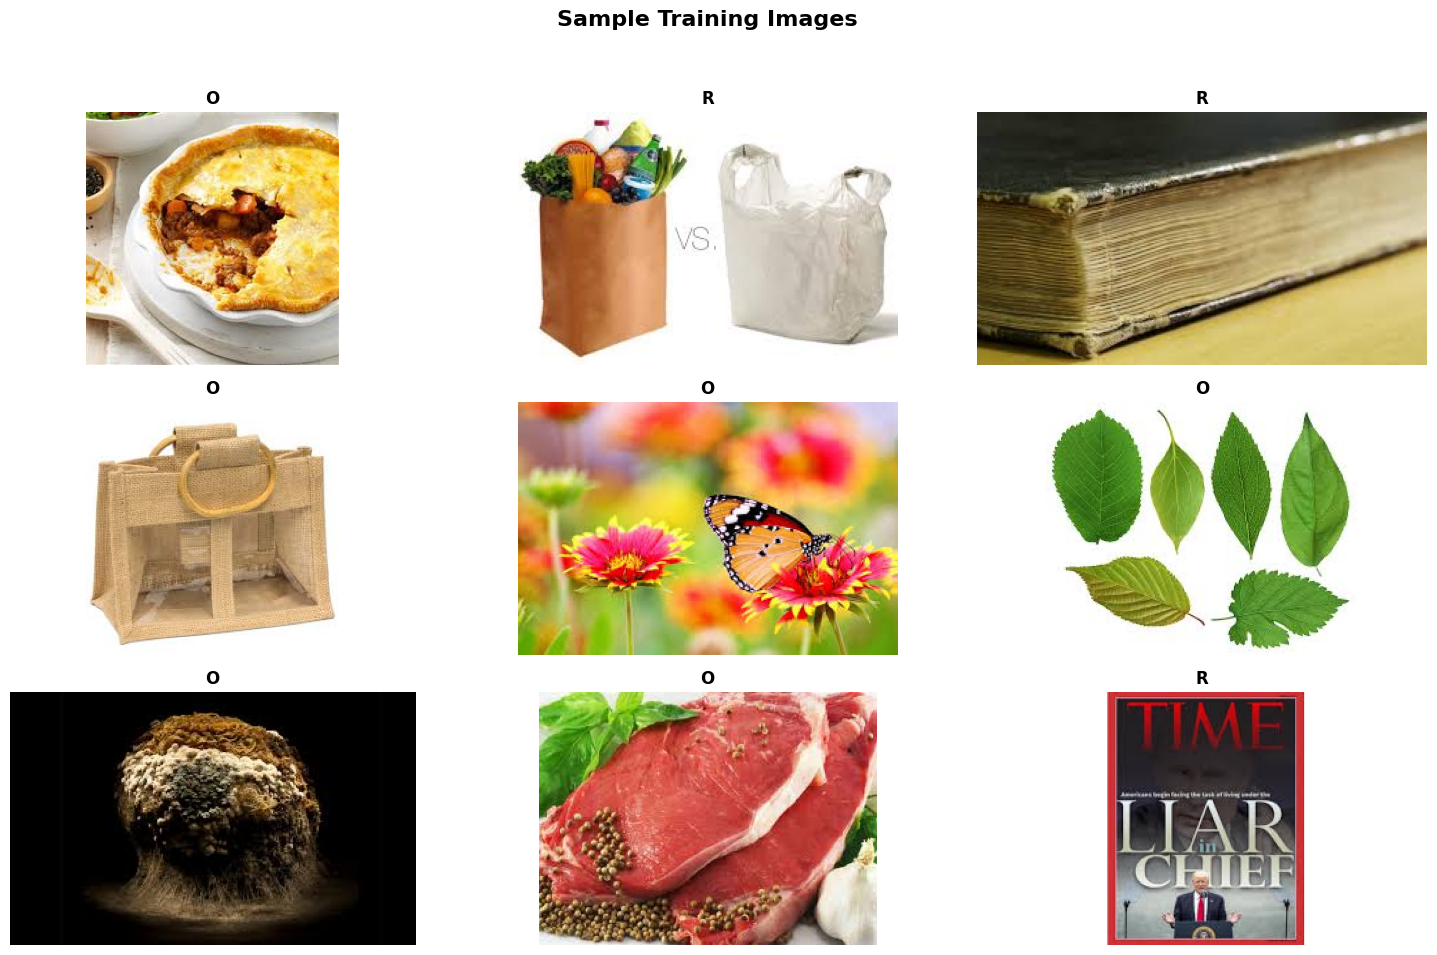


--- 4. Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,800,129 (98.42 MB)

 Trainable params: 25,800,129 (98.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.

--- 6. Starting Model Training ---
Epoch 1/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.7695 - loss: 0.5435 - val_accuracy: 0.8683 - val_loss: 0.3310
Epoch 2/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.8424 - loss: 0.3860 - val_accuracy: 0.8942 - val_loss: 0.2609
Epoch 3/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.8597 - loss: 0.3516 - val_accuracy: 0.8699 - val_loss: 0.3253
Epoch 4/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.8693 - loss: 0.3259 - val_accuracy: 0.8603 - val_loss: 0.3470
Epoch 5/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.8834 - loss: 0.2912 - val_accuracy: 0.9009 - val_loss: 0.2668
Epoch 6/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.9007 - loss: 0.2526 - val_accuracy: 0.8942 - val_loss: 0.3012
Epoch 7/12
706/706 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9206 - loss: 0.2018 - val_accur

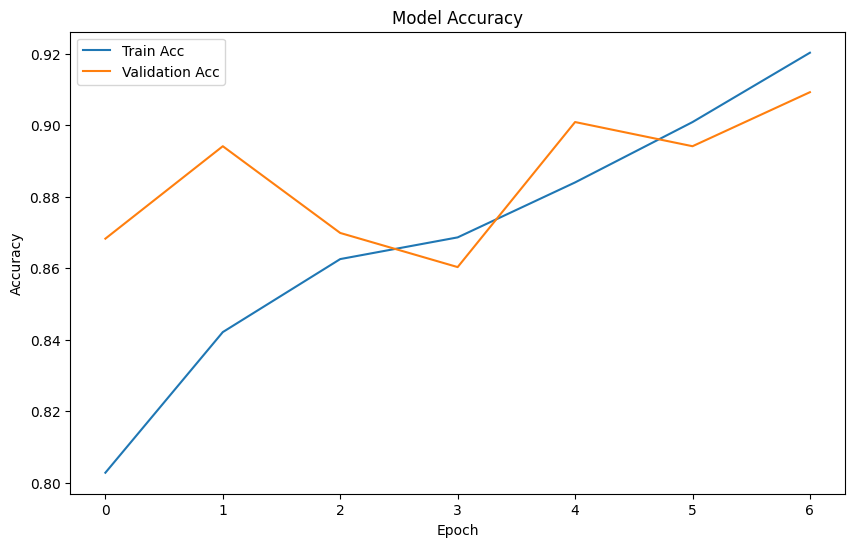

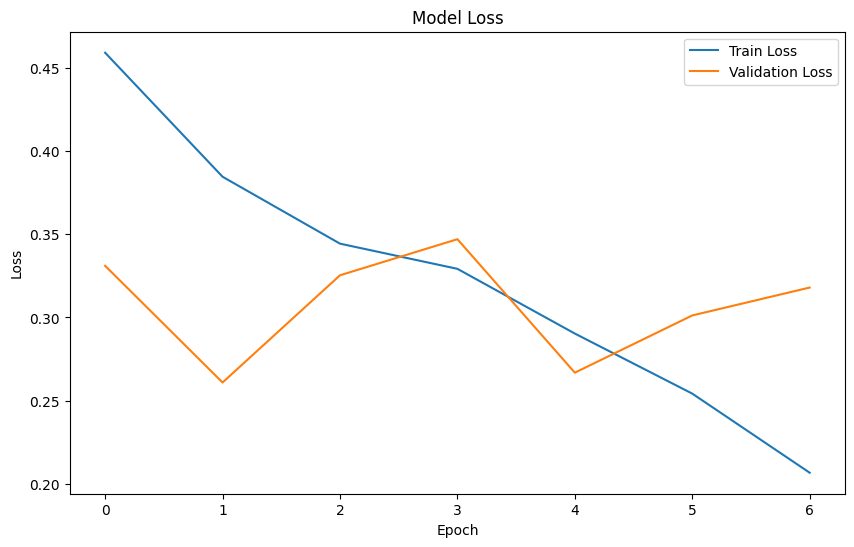


Model successfully saved to: waste_classifier_cnn.h5


Saving test_image.jpg to test_image.jpg
Uploaded test image: test_image.jpg


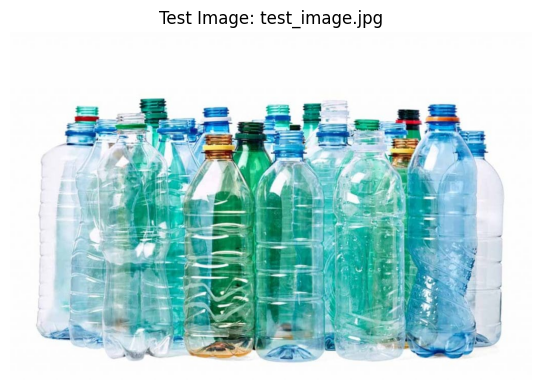

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
This image -> Recyclable (1.00 prob)


In [1]:
import kagglehub
import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# --- 1. DATASET DOWNLOAD AND SETUP ---

print("--- 1. Downloading Dataset from KaggleHub ---")
try:
    path = kagglehub.dataset_download("techsash/waste-classification-data")
    print("Path to downloaded dataset files (Kaggle cache):", path)
except Exception as e:
    print(f"Error during dataset download: {e}")
    exit()

# Define paths for local organization
source_directory = path
destination_directory = "waste_classification_data"

source_data_path = os.path.join(source_directory, "DATASET")
full_destination_path = os.path.join(destination_directory, "DATASET")

if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

print("--- 2. Copying Dataset Locally ---")
try:
    if os.path.exists(full_destination_path):
        print(f"Destination directory '{full_destination_path}' already exists. Skipping copy.")
    else:
        shutil.copytree(source_data_path, full_destination_path)
        print(f"Directory copied to: {full_destination_path}")
except Exception as e:
    print(f"An error occurred during copy: {e}")
    exit()

# Paths for training/testing
train_path = "waste_classification_data/DATASET/TRAIN"
test_path = "waste_classification_data/DATASET/TEST"

# --- 3. DATA LOADING AND EXPLORATION ---

x_data, y_data = [], []
print("--- 3. Loading Images and Labels ---")
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*'), desc=f"Loading {os.path.basename(category)}"):
        img_array = cv2.imread(file)
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(category.split("/")[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})

print(f"\nTotal images loaded: {data.shape[0]}")
print("Label Counts:\n", data.label.value_counts())

# Pie Chart
colors = ['#a0d157','#c48bb8']
plt.figure(figsize=(6, 6))
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=data.label.value_counts().index, colors=colors, radius=1)
plt.title("Training Data Label Distribution")
plt.show()

# Sample Images
plt.figure(figsize=(15, 10))
plt.suptitle("Sample Training Images", fontsize=16, fontweight='bold')
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = np.random.randint(len(data))
    plt.title(f'{data.label[index]}', fontdict={'size': 12, 'weight': 'bold'})
    plt.imshow(data.image[index])
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 4. MODEL DEFINITION ---

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))   # binary classification

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("\n--- 4. Model Summary ---")
model.summary()

# --- 5. DATA GENERATORS ---

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        color_mode="rgb",
        class_mode="binary")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        color_mode="rgb",
        class_mode="binary")

# --- 6. MODEL TRAINING ---

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\n--- 6. Starting Model Training ---")
hist = model.fit(
    x=train_generator,
    epochs=12,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# --- 7. PLOT HISTORY AND SAVE MODEL ---

plt.figure(figsize=[10, 6])
plt.plot(hist.history["accuracy"], label="Train Acc")
plt.plot(hist.history["val_accuracy"], label="Validation Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label="Train Loss")
plt.plot(hist.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

model_path = 'waste_classifier_cnn.h5'
model.save(model_path)
print(f"\nModel successfully saved to: {model_path}")



# --- 8. PREDICTION FUNCTION (Colab-friendly) ---
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

# Upload test image from your computer
uploaded = files.upload()  # This will open a file chooser
test_img = list(uploaded.keys())[0]  # Automatically take the uploaded filename
print("Uploaded test image:", test_img)

try:
    # Load saved model
    model = tf.keras.models.load_model(model_path)

    # Prediction function
    def predict_func(img_path):
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error: Could not read image at path: {img_path}")
            return

        # Display the image
        plt.figure(figsize=(6, 4))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Test Image: {os.path.basename(img_path)}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        # Preprocess for model
        img_resized = cv2.resize(img, (224, 224))
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) / 255.0
        img_input = np.expand_dims(img_rgb, axis=0)

        # Predict
        prediction = model.predict(img_input)[0][0]

        if prediction > 0.5:
            print(f"This image -> Recyclable ({prediction:.2f} prob)")
        else:
            print(f"This image -> Organic ({1-prediction:.2f} prob)")

    # Run prediction
    predict_func(test_img)

except Exception as e:
    print(f"\nAn error occurred during prediction: {e}")

